In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys

Connecting map-superuser@datajoint.mesoscale-activity-map.org:3306


# Training history

In [3]:
from pipeline.plot import foraging_plot
foraging_plot.plot_training_summary()

Compare Allen headbar with Janelia headbar

In [ ]:
%matplotlib inline
allen_headbar_allen = tuple([f'KH_FB{n}' for n in np.r_[10, 15, 17:21, 26:37]])
jenalie_headbar_allen = ("HH19", "HH20", *[f'KH_FB{n}' for n in np.r_[8, 9, 12:15, 22:25]])
jenelia_headbar_janelia = tuple((lab.WaterRestriction & (experiment.BehaviorTrial & 'task LIKE "foraging%"') 
                         & f'water_restriction_number NOT in {*allen_headbar_allen, *jenalie_headbar_allen}').fetch('water_restriction_number'))

foraging_plot.plot_training_summary(highlight={
    jenelia_headbar_janelia: dict(color='grey', label='Jenelia headbar @ Janelia'), 
    jenalie_headbar_allen: dict(color='black', label='Janelia headbar @ Allen'),
    allen_headbar_allen: dict(color='red', label='Allen headbar @ Allen')})

# Model fitting

In [ ]:
foraging_model.Model()

In [4]:
foraging_model.Model() * foraging_model.Model.Param() & 'model_id=0'

model_id,"model_param e.g. learn_rate, epsilon, w_tau1","model_class e.g. LossCounting, RW1972, Hattori2019",model_notation,n_params Effective param count,is_bias,is_epsilon_greedy,is_softmax,is_choice_kernel,desc Long name,fit_cmd Fitting command compatible with the Dynamic-Foraing repo,"param_idx To keep params the same order as the original definition in MODELS, hence `fit_result.x`",param_lower_bound,param_higher_bound
0,loss_count_threshold_mean,LossCounting,"LossCounting ($\mu_{LC}$, $\sigma_{LC}$)",2,0,0,0,0,"LossCounting: mean, std, no bias",=BLOB=,0,0.0,40.0
0,loss_count_threshold_std,LossCounting,"LossCounting ($\mu_{LC}$, $\sigma_{LC}$)",2,0,0,0,0,"LossCounting: mean, std, no bias",=BLOB=,1,0.0,10.0


Overview of all models

In [8]:
foraging_model.Model.proj('model_notation') * (foraging_model.Model.aggr(foraging_model.FittedSessionModel.proj(..., '-n_params'), aver_lpt_aic='avg(lpt_aic)', aver_lpt_bic='avg(lpt_bic)', n='count(*)'))

model_id,model_notation,aver_lpt_aic calculated attribute,aver_lpt_bic calculated attribute,n calculated attribute
0,"LossCounting ($\mu_{LC}$, $\sigma_{LC}$)",0.5166850601898554,0.5123773291618725,1617
1,"RW1972_epsi ($\alpha$, $\epsilon$)",0.5299538604514276,0.5255494127505048,1617
2,"RW1972_softmax ($\alpha$, $\sigma$)",0.5339805699824992,0.529547507776179,1617
3,"LNP_softmax ($\tau_1$, $\sigma$)",0.5929560991777044,0.5880582843323733,1617
4,"LNP_softmax ($\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$)",0.595708882358978,0.5859266874704674,1617
5,"Bari2019 ($\alpha$, $\delta$, $\sigma$)",0.5901913498755805,0.5828998162374868,1617
6,"Hattori2019 ($\alpha_{rew}$, $\alpha_{unr}$, $\sigma$)",0.5355957094798799,0.528944042448505,1617
7,"Hattori2019 ($\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$)",0.6153179504802069,0.6052209600373116,1617
8,"RW1972_epsi ($\alpha$, $\epsilon$, $b_L$)",0.5513050369480619,0.5444553808695605,1617
9,"RW1972_softmax ($\alpha$, $\sigma$, $b_L$)",0.5597611644530488,0.5528114723363038,1617


Best lpt_aic for all mice, all sessions

In [ ]:
dj.U('subject_id','session').aggr(foraging_model.FittedSessionModel, max_lpt_aic='max(lpt_aic)')

## Session-wise plots

In [12]:
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice, _get_model_comparison_results

Plot model comparison for a certain session

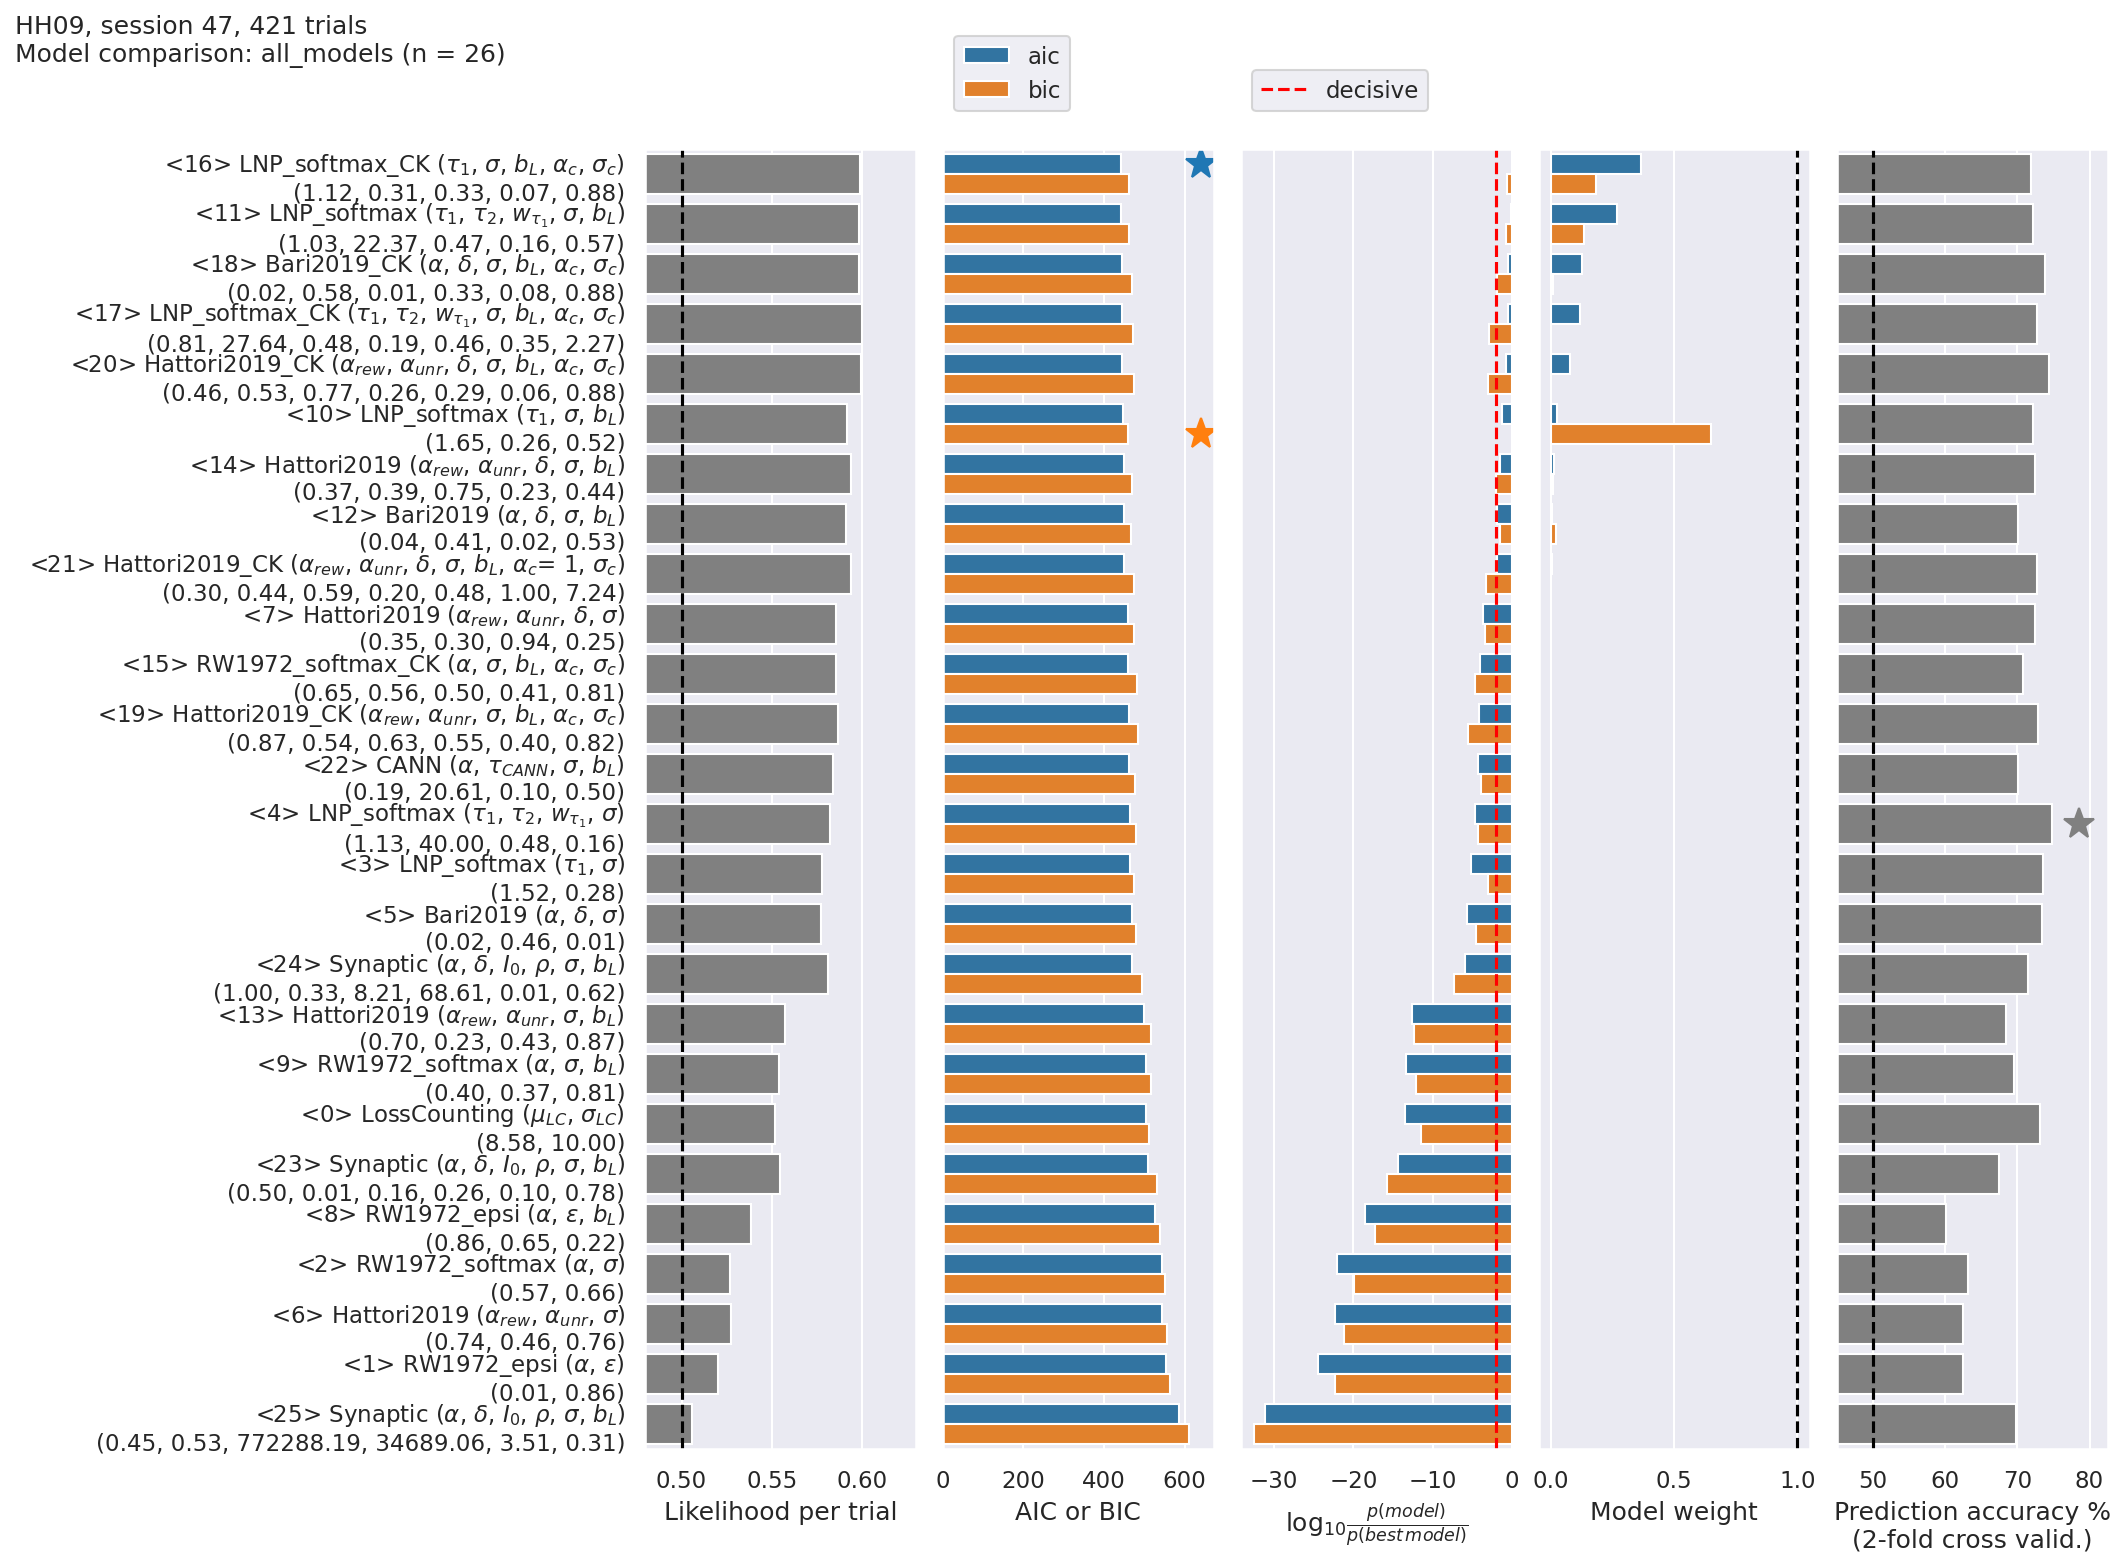

In [23]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")
plot_session_model_comparison(unit_key, model_comparison_idx=0, sort='aic')

Get all raw data from model comparison

In [ ]:
a,_ = _get_model_comparison_results({'subject_id': 473361, 'session': 47}, sort='aic')
a

Plot model fitting result of a given session

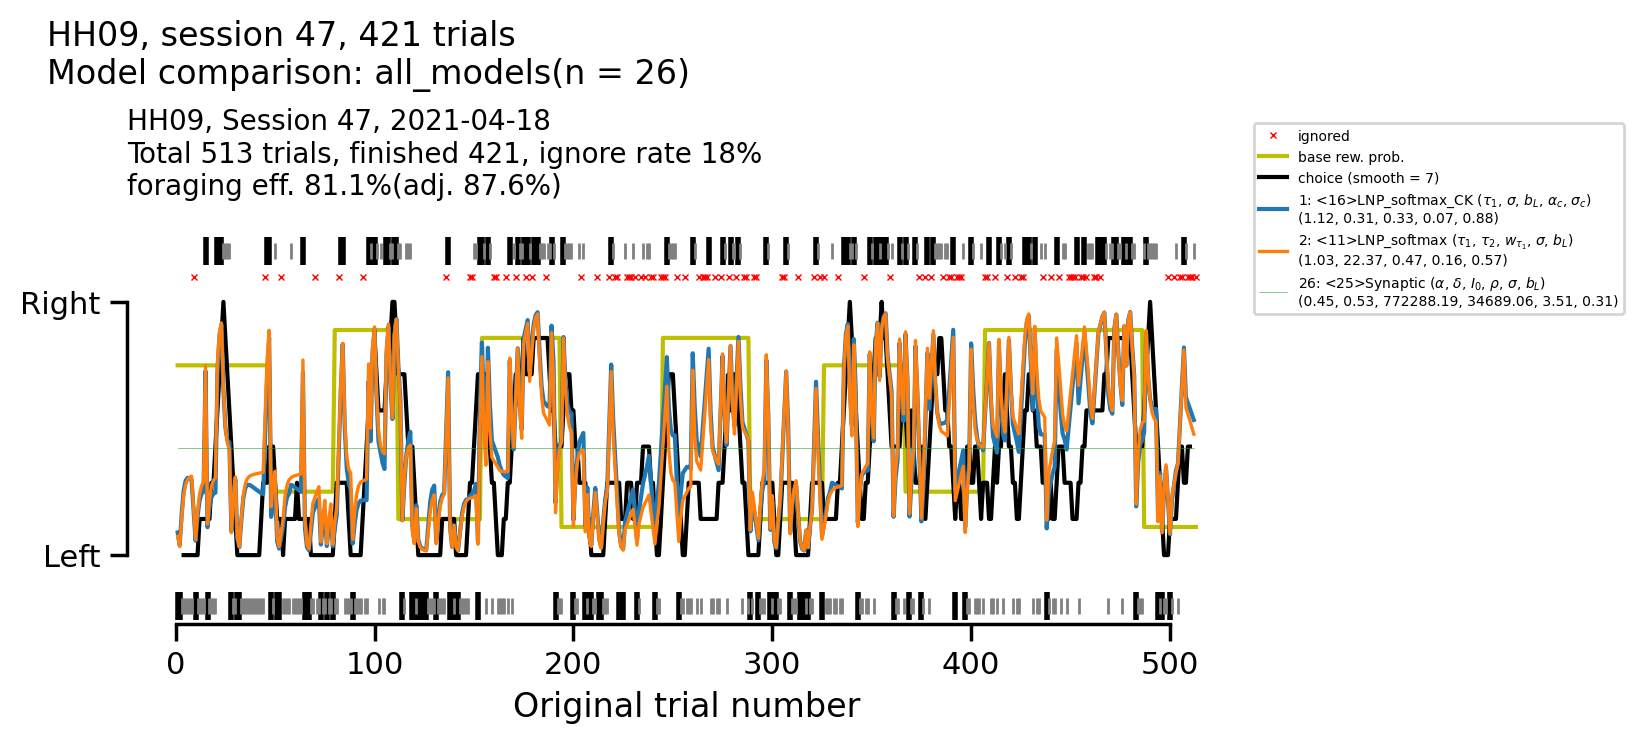

In [21]:
plot_session_fitted_choice(unit_key, first_n=2, last_n=1, smooth_factor=7, remove_ignored=False);

## Subject-wise plots

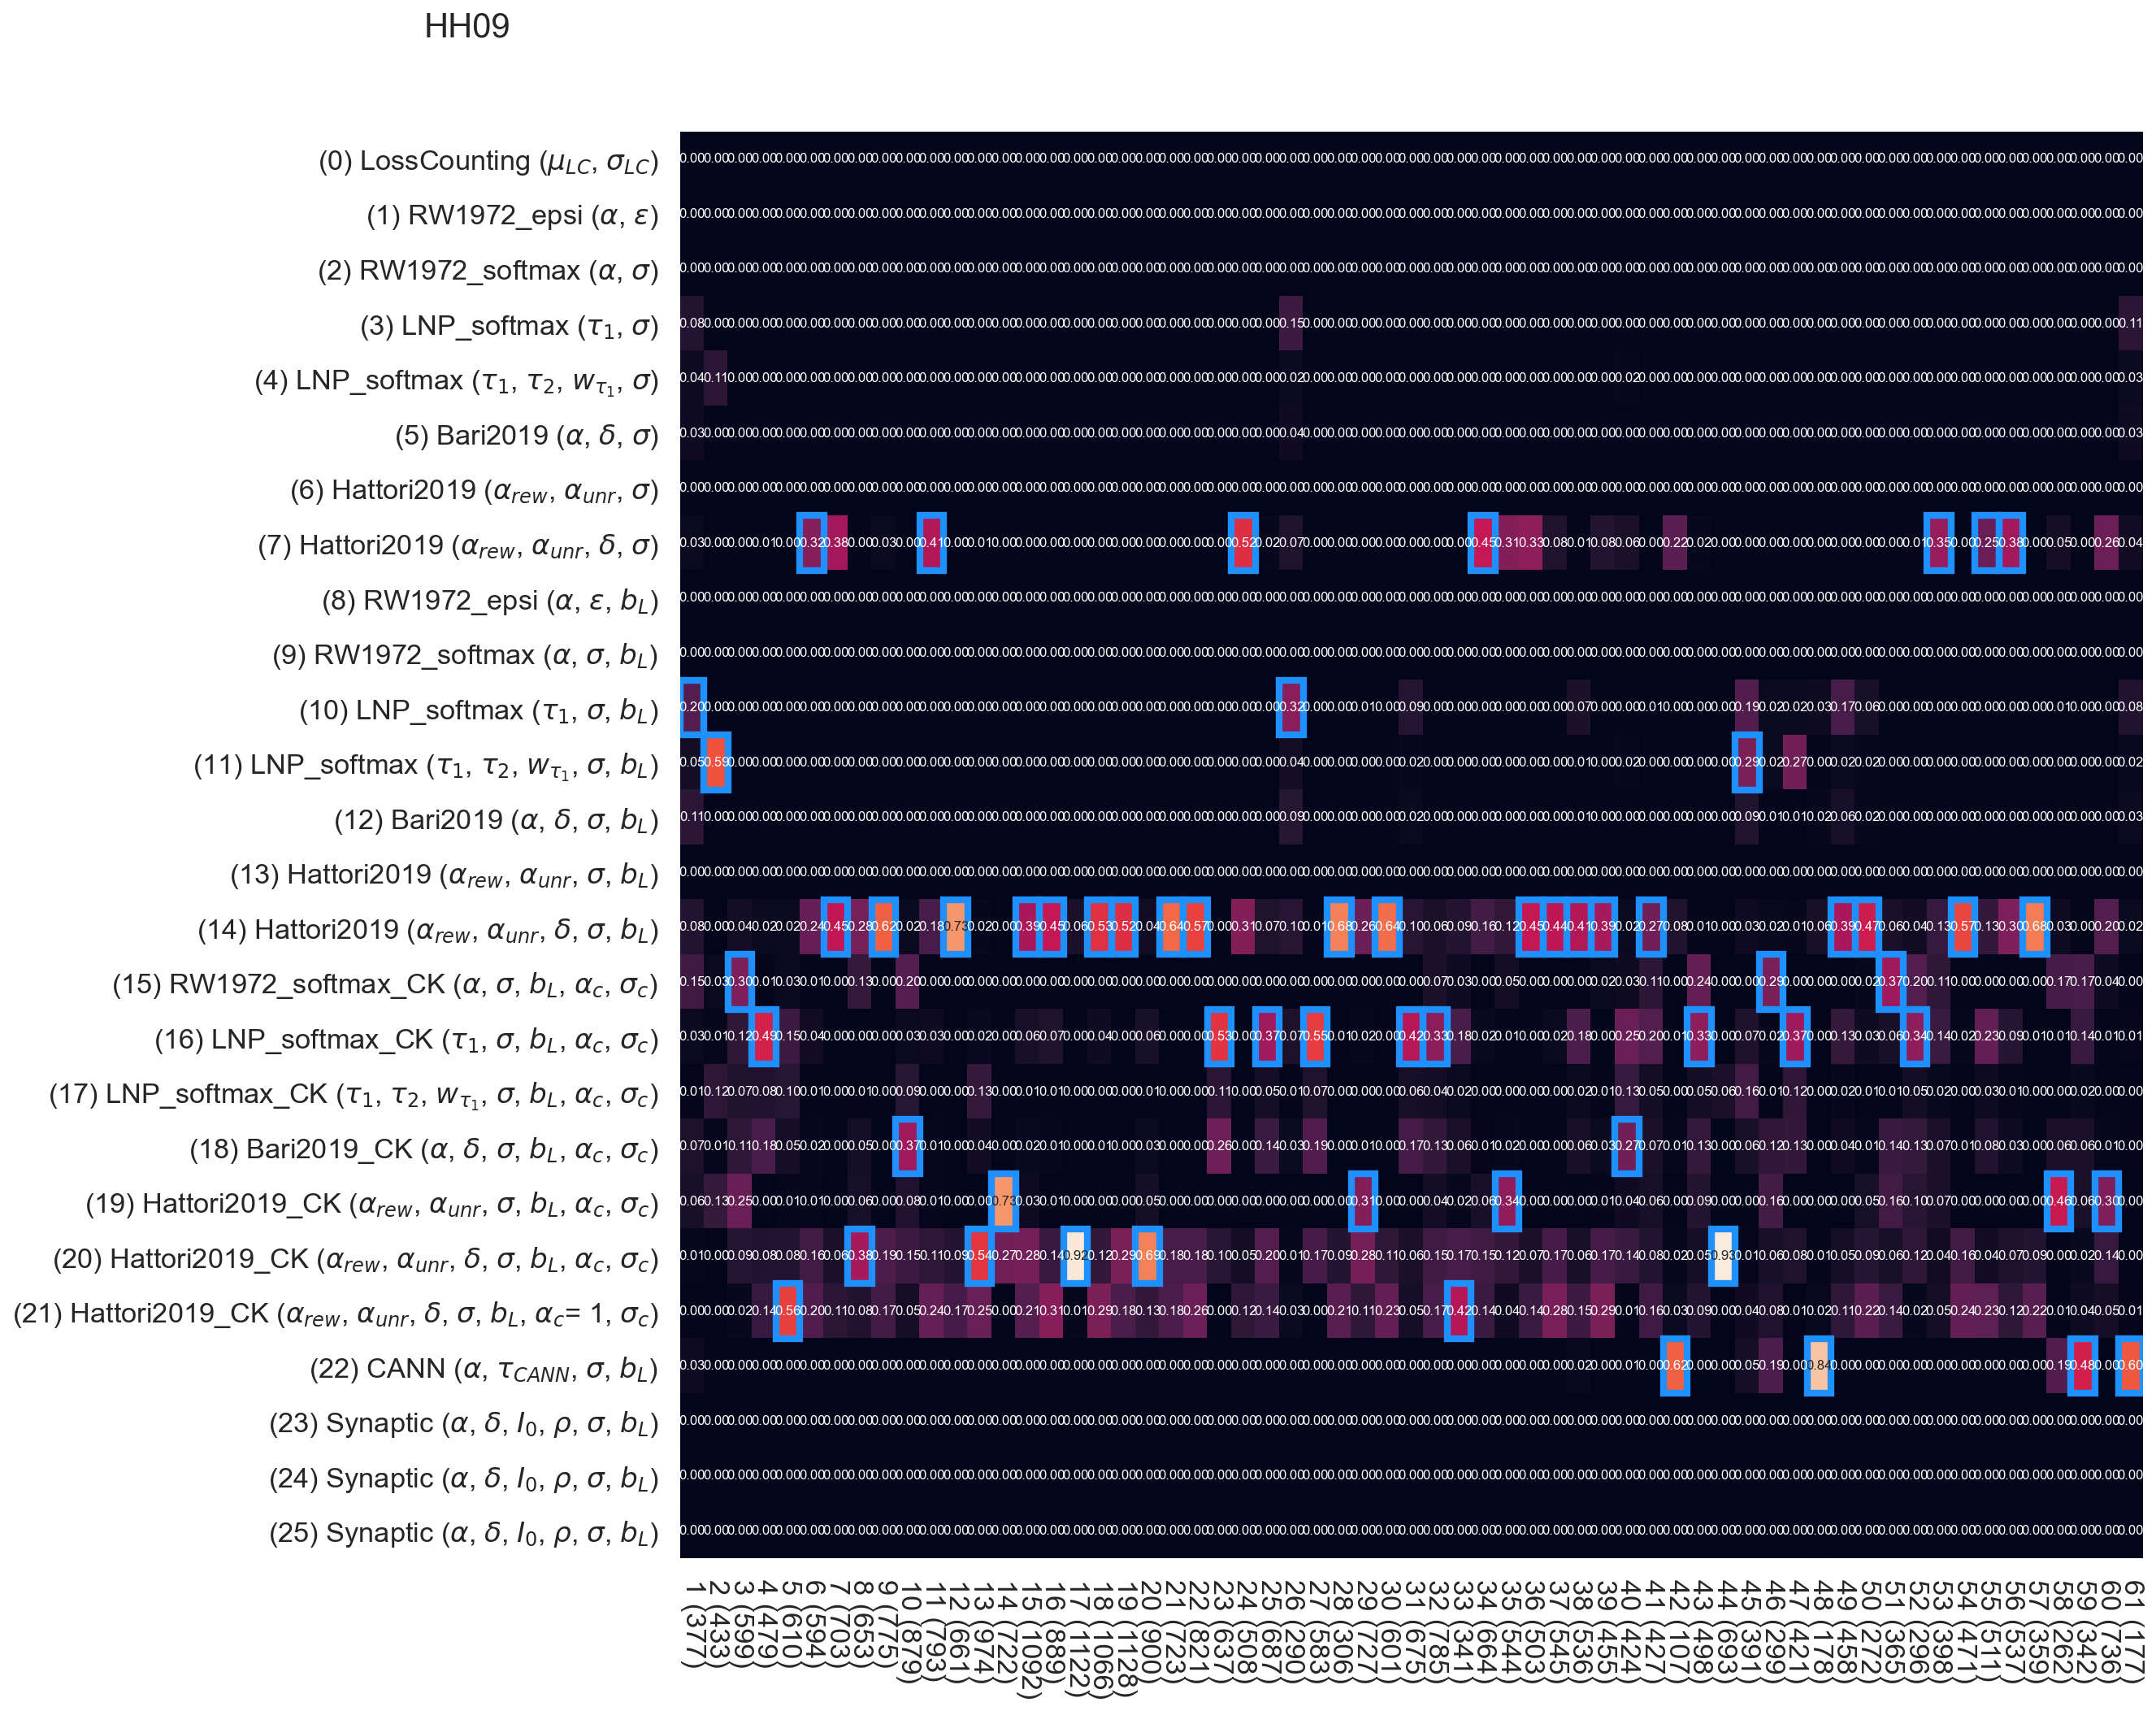

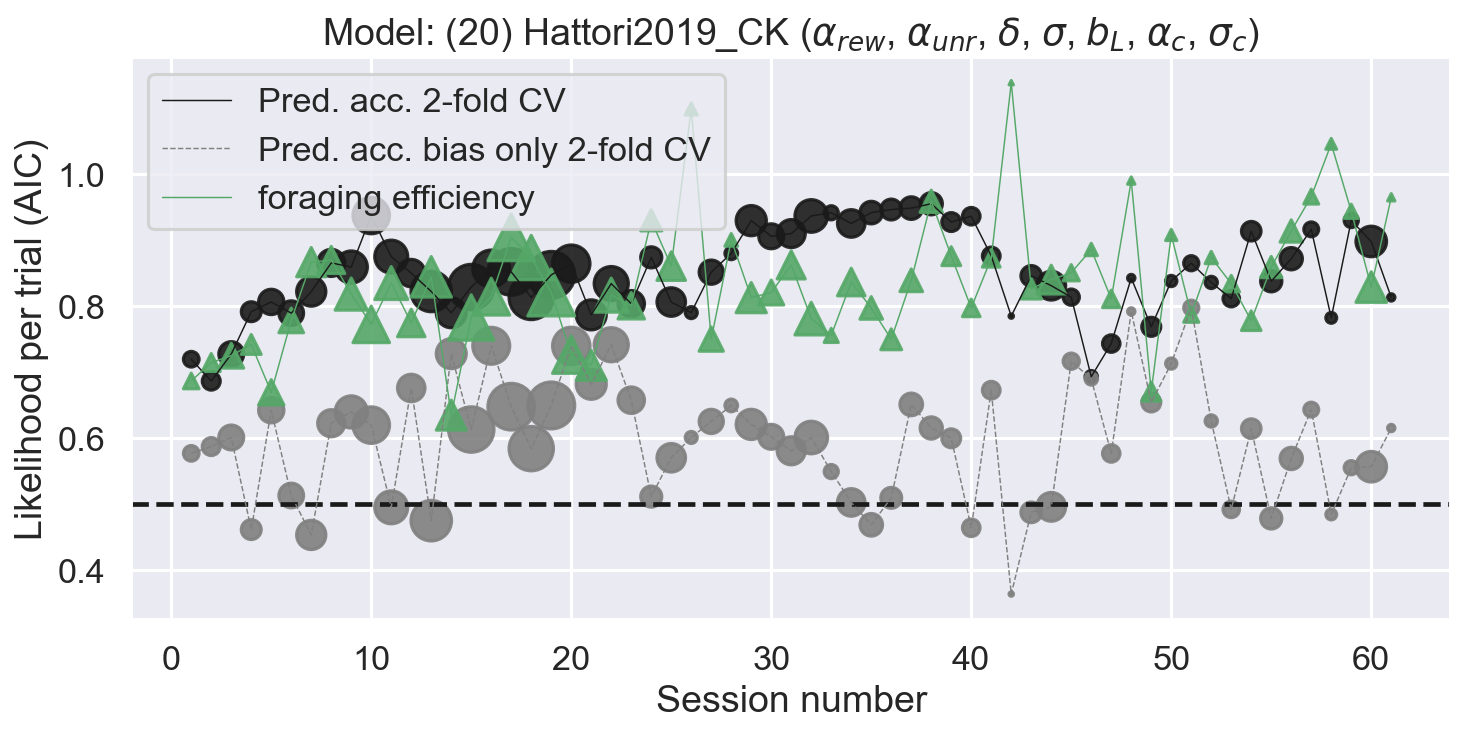

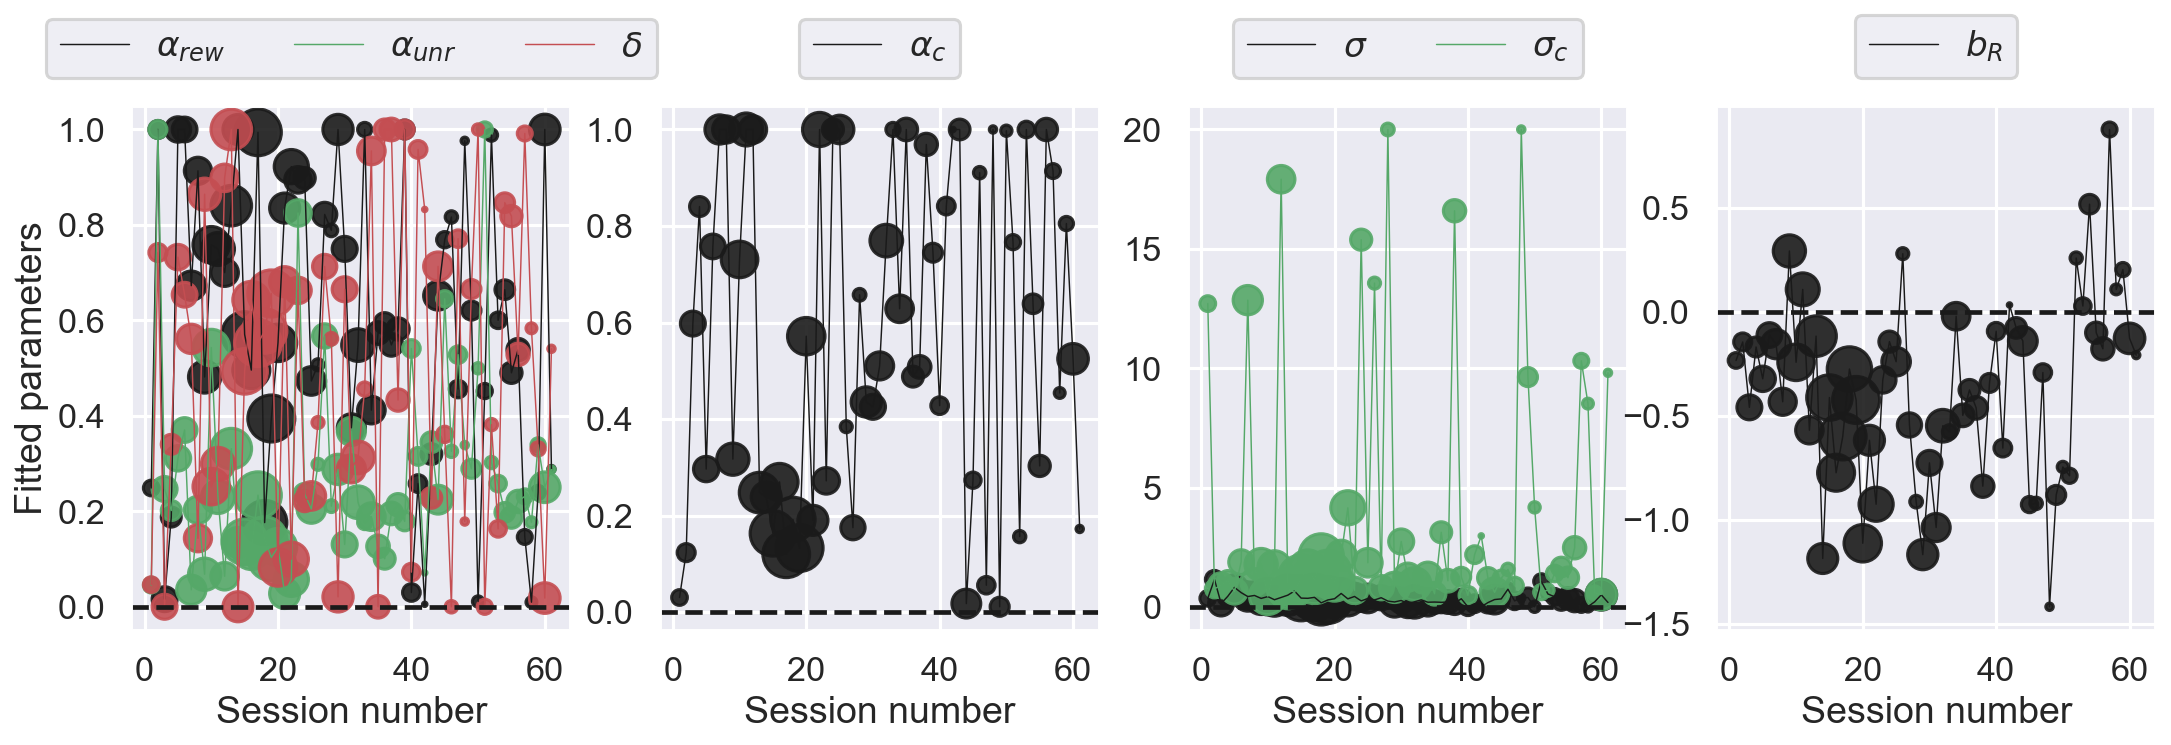

In [32]:
from pipeline.plot.foraging_model_plot import plot_mouse_fitting_results
plot_mouse_fitting_results(subject_id = 473361, model_to_plot_history=20, 
                           para_to_plot_group=[['learn_rate_rew', 'learn_rate_unrew', 'forget_rate'],
                                               ['choice_step_size'],
                                               ['softmax_temperature', 'choice_softmax_temperature'],
                                               ['biasR']]);